In [3]:
import pandas as pd
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import exp
%matplotlib inline
sns.set()

In [33]:
data1 = pd.read_csv('ex2data1.txt', header = None, names = ['exam1', 'exam2', 'y'])
data1['ones'] = pd.Series(np.ones(100), dtype = int)
data1 = data1[['ones', 'exam1', 'exam2', 'y']]
X = np.matrix(data1.iloc[:, 0:3])
y = np.matrix(data1.iloc[:, 3:])

In [59]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data.iloc[:, 3] == 0
    pos = data.iloc[:, 3] == 1
    
    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos].iloc[:, 1], data[pos].iloc[:, 2], marker = '+', c = 'k', s = 50, linewidth = 2, label = label_pos)
    axes.scatter(data[neg].iloc[:, 1], data[neg].iloc[:, 2], c = 'b', s = 50, label = label_neg)
    plt.xlim(25, 110)
    plt.ylim(25, 110)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

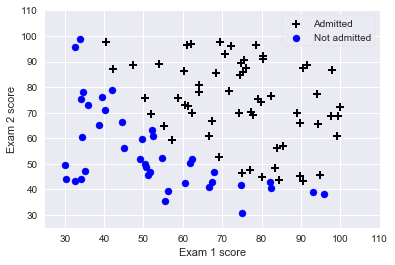

In [60]:
plotData(data1, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')

In [26]:
def gFunction(z):
    return sc.special.expit(z)

In [36]:
def hFunction(X, theta):
    theta = np.matrix(theta).T
    h = np.matrix(gFunction(X.dot(theta)))
    return h

In [54]:
def costFunction(X, y, theta):
    m = y.size
    h = gFunction(X.dot(theta))
    j = (-1 / m) * (np.log(h).dot(y) + np.log(1-h).dot(1-y))
    if np.isnan(j):
        return(np.inf)
    return j

In [55]:
costFunction(X, y, [0, 0, 0])

matrix([[ 0.69314718]])

In [53]:
def gradientDescent(X, y, theta):
    m = y.size
    cost = np.zeros(num_iters)
    Ftheta = np.matrix(theta).T
    
    for iter in np.arange(num_iters):
        h = hFunction(X, theta)
        Ftheta = Ftheta - alpha * (X.T.dot(h - y))
        cost[iter] = costFunction(X, y, theta)
    
    return(theta, cost)